In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

plt.style.use("fivethirtyeight")

## Motivation

Autoregressive (AR) models are a type of time series model in which the value at any point in time is a linear function of the previous values and white noise.
AR models have many applications including, but not limited to, mathematical finance.

In this short article, we derive the [maximum likelihood estimator (MLE)](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) for the coefficients and variance of an autoregressive model when the white noise is normally distributed.
We will do this by appealing to the finite memory of the AR process.

As an example application, we use our findings to fit the parameters of an [Ornstein–Uhlenbeck process](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process).

## Autoregressive process

An *autoregressive process* of order p, or AR(p), is a stochastic process $(X_1, X_2, \ldots)$ satisfying

$$
X_n
= c_0 + \sum_{i = 1}^p c_i X_{n - i} + \epsilon_n
$$

where $c_i$ are (non-random) coefficients and $(\epsilon_1, \epsilon_2, \ldots)$ is a [white noise process](https://en.wikipedia.org/wiki/White_noise) (i.e., the $\epsilon_n$ have zero mean and finite variance and are IID).
The $X_{-(p-1)}, \ldots, X_0$ are initial conditions that, for simplicity, we assume to be (non-random) constants.

*Remark*.
Most definitions of AR(p) processes do not include a bias term $c_0$ which we include for greater generality.

It will be useful, for a subsequent section, to define some notation.
Let

$$
\mathbf{X}_{N,i}
= \begin{pmatrix}
X_{1 - i} \\
\vdots \\
X_{N - i}
\end{pmatrix}
$$

In other words, $\mathbf{X}_{N, i}$ are the the first $N$ observations after a shift backwards by $i$ steps.
Furthermore, let

$$
\mathbf{A}_N
= \begin{pmatrix} \mathbf{1} & \mathbf{X}_{N, 1} & \ldots & \mathbf{X}_{N, p} \end{pmatrix}
$$

be the $N \times (p + 1)$ design matrix which contains the ones vector as its first column and the various shift vectors as its subsequent columns.

## Maximum likelihood estimator

Suppose we have observed to the process up to and including time $N$.
The corresponding likelihood (assuming absolute continuity) is

$$
\mathcal{L}
= f(X_1, \ldots, X_N)
= f(X_1) f(X_2 \mid X_1) f(X_3 \mid X_1, X_2) \cdots f(X_N \mid X_1, \ldots, X_{N - 1}).
$$

Since the process at a fixed time depends only on its last $p$ values, we can simplify this further to

$$
\mathcal{L}
= \prod_{n = 1}^N f(X_n \mid X_{n - 1}, \ldots, X_{n - p}).
$$

When the white noise is normal, the conditional densities above are normal densities and we can obtain very simple expressions for the MLEs:

**Proposition.**
Consider an AR(p) model under normal white noise with variance $\sigma^2_\epsilon$.
MLEs for the coefficients and variance satisfy

$$
(\mathbf{A}_N^\intercal \mathbf{A}_N) \hat{\mathbf{c}}
= \mathbf{A}_N^\intercal \mathbf{X}_{N, 0}
$$

and

$$
N \hat{\sigma}^2_\epsilon =
\mathbf{1}^\intercal ( \mathbf{A}_N \hat{\mathbf{c}} - \mathbf{X}_{N, 0} )^{\circ 2}
$$

where $\mathbf{M}^{\circ 2}$ is the element-wise square of the matrix $\mathbf{M}$.

*Proof*.
As discussed above, the log-likelihood is

$$
\log \mathcal{L}
= \sum_{n = 1}^N \log f(X_n \mid X_{n - 1}, \ldots, X_{n - p})
= \mathrm{const.} - \frac{N}{2} \log \sigma^2_\epsilon -
  \frac{1}{2 \sigma^2_\epsilon} \sum_{n = 1}^N \left(
    c_0 + c_1 X_{n - 1} + \cdots + c_p X_{n - p} - X_n
  \right)^2.
$$

We recognize this as equivalent to the log-likelihood used to derive the normal equations for [ordinary least squares (OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares#cite_note-14) in the presence of a bias.
The predictors, in this case, are the shifted realizations $\mathbf{X}_{N, i}$.
From this, the desired result follows.

## Example: Ornstein–Uhlenbeck process

The *Ornstein-Uhlenbeck process* $(Y_t)_{t \geq 0}$ is a stochastic process satisfying the stochastic differential equation

$$
dY_t = \theta \left(\mu - Y_t\right) dt + \sigma dW_t
$$

where $\theta > 0$ and $\sigma > 0$ are parameters.
Suppose we observe the process at sequence of (increasing) equally-spaced times $t_1, t_2, \ldots, t_N$.
By the above,

$$
\Delta Y_n
= \theta \left(\mu \Delta t - \int_{t_{n - 1}}^{t_n} Y_s ds\right) + \sigma \Delta W_n
\approx \theta \left(\mu - Y_{t_{n - 1}} \right) \Delta t + \sigma \Delta W_n
$$

where $\Delta Y_n = Y_{t_n} - Y_{t_{n - 1}}$, $\Delta t = t_n - t_{n - 1}$, and $\Delta W_n = W_{t_n} - W_{t_{n - 1}}$.
By approximating the integral using its leftmost endpoint, we have arrived at the AR(1) sequence

$$
X_n = \underbrace{\theta \mu \Delta t}_{c_0} +
      \underbrace{\left(1 - \theta  \Delta t\right)}_{c_1} X_{n - 1} +
      \underbrace{\sigma \Delta W_n}_{\epsilon_n}
$$

where $X_n \approx Y_{t_n}$.
Note, in particular, that the conditional increments are normal.

*Remark*.
This approximation is called the [Euler-Maruyama method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method).

Now, we are in a position to estimate the parameters $\theta$, $\mu$, and $\sigma$.
However, recall that in deriving the MLEs, we expressed our results in terms of $c$ and $\sigma^2_\epsilon$!
Fortunately, due to the [equivariance of MLEs](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#Functional_invariance), we can rely on the transformations

$$
\begin{align*}
\hat{\theta} & = ( 1 - \hat{c}_1 ) / \Delta t \\
\hat{\mu} & = \hat{c}_0 / ( \hat{\theta} \Delta t ) \\
\hat{\sigma}^2 & = \hat{\sigma}^2_\epsilon / \Delta t
\end{align*}
$$

to retrieve the parameters of interest.

Let's try this out with some synthetic data below!

In [2]:
N = 1_000

T = 1.
θ = 10.
μ = 0.5
σ = 0.1
Y0 = 1.

np.random.seed(1)
Y = np.empty((N + 1,))
    
Y[0] = Y0
Δt = T / N
for n in range(N):
    ΔW = np.sqrt(Δt) * np.random.randn()
    Y[n + 1] = θ * μ * Δt + (1. - θ * Δt) * Y[n] + σ * ΔW

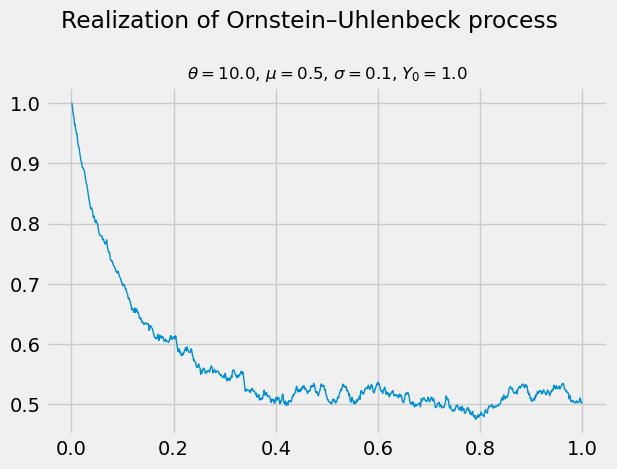

In [3]:
plt.plot(np.linspace(0., T, N + 1), Y, linewidth=1)
plt.suptitle("Realization of Ornstein–Uhlenbeck process")
plt.title(f"$\\theta = {θ}$, $\\mu = {μ}$, $\\sigma = {σ}$, $Y_0 = {Y0}$", fontsize=12)
plt.tight_layout()

In [6]:
A_N = np.stack([np.ones_like(Y, shape=(N, )), Y[:-1]], axis=1)
X_N0 = Y[1:]

c_hat = np.linalg.solve(A_N.T @ A_N, A_N.T @ X_N0)
σ2_ε_hat = ((A_N @ c_hat - X_N0)**2).sum() / N

θ_hat = (1. - c_hat[1]) / Δt
μ_hat = c_hat[0] / (θ_hat * Δt) 
σ2_hat = σ2_ε_hat / Δt

σ_hat = np.sqrt(σ2_hat)

In [7]:
tabulate([["θ", θ, θ_hat], ["μ", μ, μ_hat], ["σ", σ, σ_hat]],
         headers=("Parameter", "Exact", "MLE"), tablefmt="html")

'<table>\n<thead>\n<tr><th>Parameter  </th><th style="text-align: right;">  Exact</th><th style="text-align: right;">      MLE</th></tr>\n</thead>\n<tbody>\n<tr><td>θ          </td><td style="text-align: right;">   10  </td><td style="text-align: right;">10.1671  </td></tr>\n<tr><td>μ          </td><td style="text-align: right;">    0.5</td><td style="text-align: right;"> 0.513091</td></tr>\n<tr><td>σ          </td><td style="text-align: right;">    0.1</td><td style="text-align: right;"> 0.098099</td></tr>\n</tbody>\n</table>'